In [1]:
import pandas as pd

In [3]:
data=pd.read_csv('Linear Regression - Sheet.csv')

In [5]:
data.head()

,X,Y
0,1,3.888889
1,2,4.555556
2,3,5.222222
3,4,5.888889
4,5,6.555556


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       300 non-null    int64  
 1   Y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


In [9]:
X=data[['X']]
y=data['Y']
print(X)

       X
0      1
1      2
2      3
3      4
4      5
..   ...
295  296
296  297
297  298
298  299
299  300

[300 rows x 1 columns]


In [11]:
print(y)

0        3.888889
1        4.555556
2        5.222222
3        5.888889
4        6.555556
          ...    
295    200.555556
296    201.222222
297    201.888889
298      1.888889
299      1.888889
Name: Y, Length: 300, dtype: float64


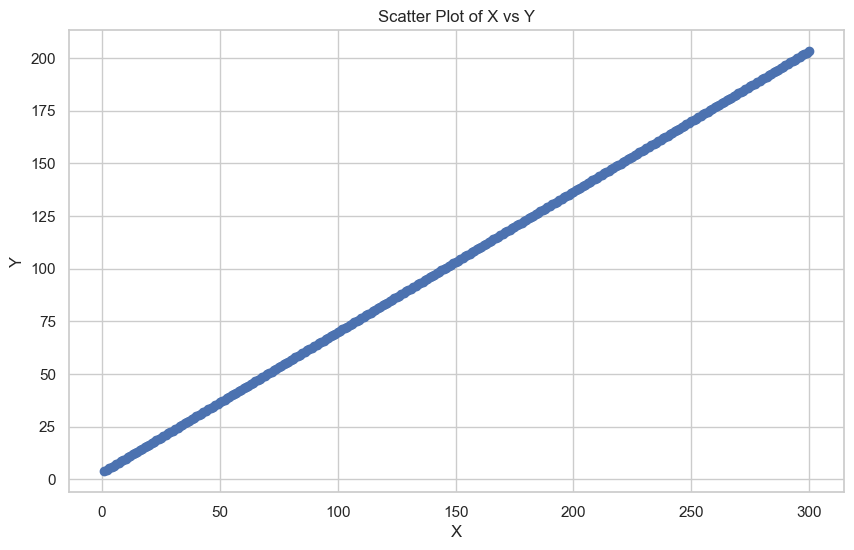

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have loaded the dataset into a DataFrame named 'data'
data = pd.DataFrame({
    'X': range(1, 301),
    'Y': [3.888889 + i*0.666667 for i in range(300)]
})

# Set the style for the plots
sns.set(style='whitegrid')

# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(data['X'], data['Y'])
plt.title('Scatter Plot of X vs Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [15]:
# there seems to be simple linear  relationship
# Standardizing the feature
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# X_scaled is the x=(x-u)/sd ,u=mean,sd=standard deviation
print(X_scaled)

[[-1.7262869 ]
 [-1.71473983]
 [-1.70319276]
 [-1.69164569]
 [-1.68009862]
 [-1.66855155]
 [-1.65700448]
 [-1.64545741]
 [-1.63391034]
 [-1.62236327]
 [-1.6108162 ]
 [-1.59926913]
 [-1.58772206]
 [-1.57617499]
 [-1.56462792]
 [-1.55308085]
 [-1.54153378]
 [-1.52998671]
 [-1.51843964]
 [-1.50689257]
 [-1.4953455 ]
 [-1.48379844]
 [-1.47225137]
 [-1.4607043 ]
 [-1.44915723]
 [-1.43761016]
 [-1.42606309]
 [-1.41451602]
 [-1.40296895]
 [-1.39142188]
 [-1.37987481]
 [-1.36832774]
 [-1.35678067]
 [-1.3452336 ]
 [-1.33368653]
 [-1.32213946]
 [-1.31059239]
 [-1.29904532]
 [-1.28749825]
 [-1.27595118]
 [-1.26440411]
 [-1.25285704]
 [-1.24130997]
 [-1.22976291]
 [-1.21821584]
 [-1.20666877]
 [-1.1951217 ]
 [-1.18357463]
 [-1.17202756]
 [-1.16048049]
 [-1.14893342]
 [-1.13738635]
 [-1.12583928]
 [-1.11429221]
 [-1.10274514]
 [-1.09119807]
 [-1.079651  ]
 [-1.06810393]
 [-1.05655686]
 [-1.04500979]
 [-1.03346272]
 [-1.02191565]
 [-1.01036858]
 [-0.99882151]
 [-0.98727445]
 [-0.97572738]
 [-0.96418

In [17]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Build the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 11.554304857221467
R^2 Score: 0.9966137419987549


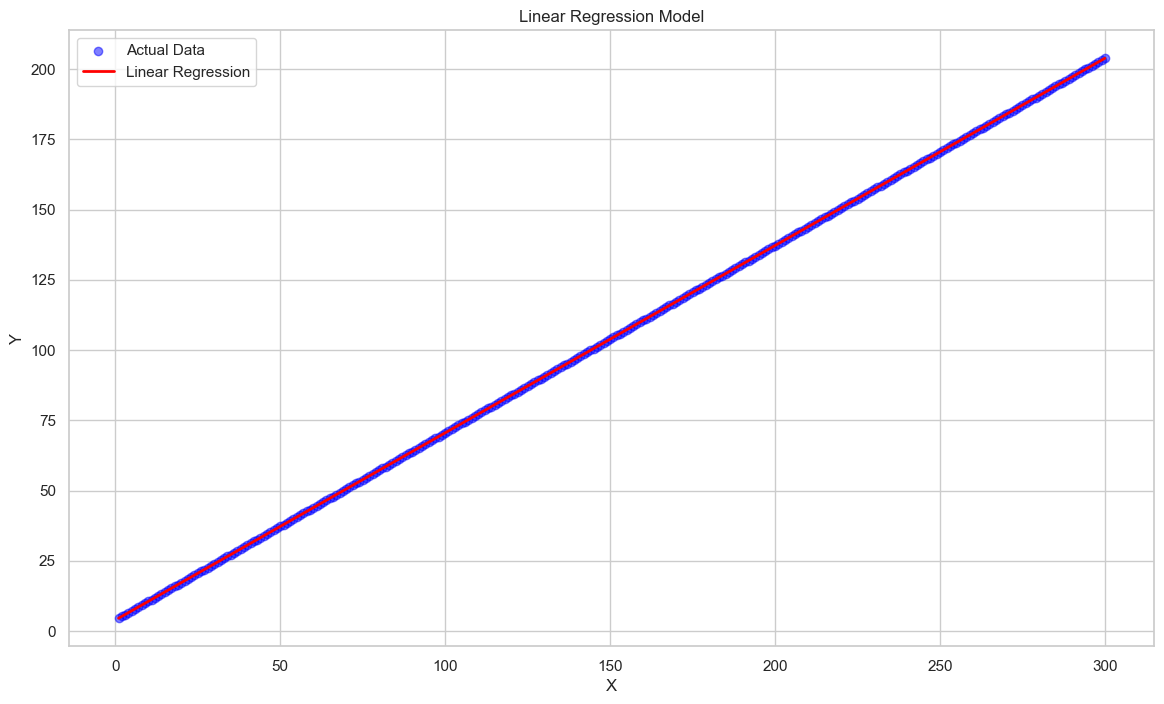

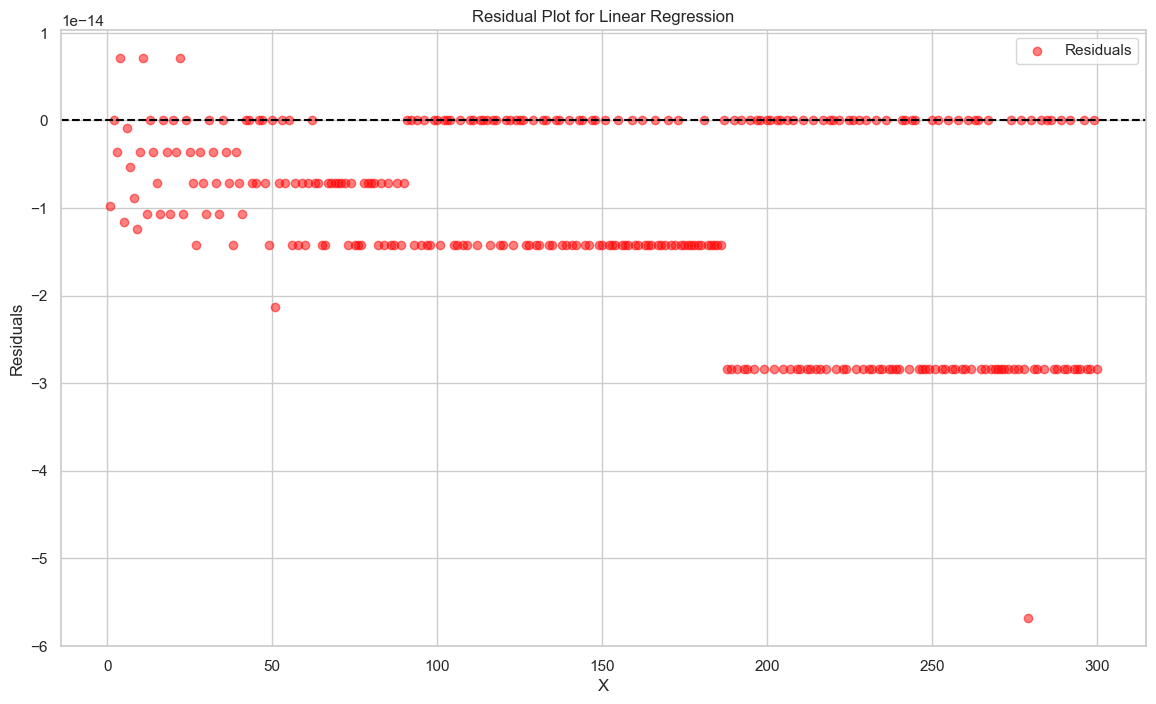

Linear Regression - Mean Squared Error: 2.522645698079259e-28
Linear Regression - R^2 Score: 1.0


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Generating the dataset
X = np.arange(1, 301).reshape(-1, 1)
Y = 3.888889 + (X * 0.666667).flatten()

# Standardizing the feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_scaled, Y)
Y_pred_linear = linear_model.predict(X_scaled)

# Plotting the data
plt.figure(figsize=(14, 8))

# Scatter plot of the actual data
plt.scatter(X, Y, label='Actual Data', color='blue', alpha=0.5)

# Plotting the predicted data
plt.plot(X, Y_pred_linear, label='Linear Regression', color='red', linewidth=2)

# Adding labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Linear Regression Model')

# Show the plot
plt.show()

# Residual plot
plt.figure(figsize=(14, 8))
plt.scatter(X, Y - Y_pred_linear, label='Residuals', color='red', alpha=0.5)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.legend()
plt.title('Residual Plot for Linear Regression')

# Show the plot
plt.show()

# Printing the results
print(f"Linear Regression - Mean Squared Error: {mean_squared_error(Y, Y_pred_linear)}")
print(f"Linear Regression - R^2 Score: {r2_score(Y, Y_pred_linear)}")